kmp 2023

Based on **Lauwens & Downey "Think Julia: How to Think Like a Computer Scientist"** 
https://benlauwens.github.io/ThinkJulia.jl/latest/book.html

Resources:

Julia webpage https://julialang.org/ 

Julia documentation https://docs.julialang.org/en/v1/


In [9]:
🐢 = 3.5  # \:turtle:<TAB> 
	
#== 
cf. Appendix A in 
https://benlauwens.github.io/ThinkJulia.jl/latest/book.html#_unicode_input
==#

typeof(🐢)

Float64

## Chapter 04 -- Interface Design -- Case Study

https://benlauwens.github.io/ThinkJulia.jl/latest/book.html#chap04

This part presents a case study to demonstrate one possible process for designing functions that work together, similar in a sense to **modules** or **packages**.

It introduces **turtle graphics**, a way to create programmatic drawings. Turtle graphics are not included in the Standard Library, so the ThinkJulia module has to be added to your Julia setup.

```Julia
	julia> ]  		# switching to package mode
	@v1.5) pkg> add https://github.com/BenLauwens/ThinkJulia.jl
		.
		.
		.
	@v1.5) pkg> <backspace>  # to exit package mode
	julia>
```

A **module** or a **package** is a file that contains a collection of related functions and other types of definitions. Julia provides some modules in its **Standard Library**. Additional functionality can be added from a growing collection of Julia **packages** (https://juliahub.com/ui/Packages).

Packages can be installed in the REPL by entering the **Pkg REPL-mode** using the key **`]`** at the Julia prompt.


This can take some time. Before we can use the functions in a module, we have to **import the module in the current Julia session** with an using statement:

```Julia
	julia> using ThinkJulia
```

In [18]:
using Plots, Pkg

In [19]:
Pkg.add(url = "https://github.com/BenLauwens/ThinkJulia.jl")

using ThinkJulia

    Updating git-repo `https://github.com/BenLauwens/ThinkJulia.jl`

   Resolving package versions...

   Installed HarfBuzz_ICU_jll ─ v2.8.1+0


   Installed Gdbm_jll ───────── v1.19.0+0
   Installed GR_jll ─────────── v0.72.8+0


   Installed Ncurses_jll ────── v6.4.1+0
   Installed PkgVersion ─────── v0.3.3
   Installed Qt5Base_jll ────── v5.15.3+2


   Installed ICU_jll ────────── v69.1.0+0


   Installed Rsvg ───────────── v1.0.0


   Installed gdk_pixbuf_jll ─── v2.42.8+0
   Installed tectonic_jll ───── v0.13.1+0
   Installed Readline_jll ───── v8.2.1+0
   Installed SnoopPrecompile ── v1.0.3


   Installed TikzPictures ───── v3.5.0


   Installed Librsvg_jll ────── v2.54.5+0


   Installed GR ─────────────── v0.72.8


   Installed Luxor ──────────── v3.7.0


    Updating `C:\Users\kmpetersson\.julia\environments\v1.9\Project.toml`
  [a7f2b756] + ThinkJulia v0.1.0 `https://github.com/BenLauwens/ThinkJulia.jl#master`
    Updating `C:\Users\kmpetersson\.julia\environments\v1.9\Manifest.toml`


  [159f3aea] + Cairo v1.0.5
⌃ [28b8d3ca] ↓ GR v0.72.9 ⇒ v0.72.8
  [a2bd30eb] + Graphics v1.1.2
  [e5e0dc1b] + Juno v0.8.4
  [ae8d54c2] + Luxor v3.7.0
  [e89f7d12] + Media v0.5.0
  [eebad327] ↑ PkgVersion v0.3.2 ⇒ v0.3.3
  [c4c386cf] + Rsvg v1.0.0
  [66db9d55] + SnoopPrecompile v1.0.3
  [a7f2b756] + ThinkJulia v0.1.0 `https://github.com/BenLauwens/ThinkJulia.jl#master`
  [37f6aa50] + TikzPictures v3.5.0
⌅ [d2c73de3] ↓ GR_jll v0.72.9+1 ⇒ v0.72.8+0
  [54ca2031] + Gdbm_jll v1.19.0+0
  [655565e8] + HarfBuzz_ICU_jll v2.8.1+0
  [a51ab1cf] + ICU_jll v69.1.0+0
  [925c91fb] + Librsvg_jll v2.54.5+0
⌅ [89763e89] ↓ Libtiff_jll v4.5.1+1 ⇒ v4.4.0+0
  [d3a379c0] + LittleCMS_jll v2.12.0+0
  [68e3532b] + Ncurses_jll v6.4.1+0
  [643b3616] + OpenJpeg_jll v2.4.0+0
  [36c8627f] + Pango_jll v1.50.9+0
  [9c32591e] + Poppler_jll v21.9.0+0
  [ea2cea3b] + Qt5Base_jll v5.15.3+2
  [c0090381] - Qt6Base_jll v6.4.2+3
  [05236dd9] + Readline_jll v8.2.1+0
  [ffd25f8a] - XZ_jll v5.4.4+0
  [da03df04] + gdk_pixbuf_jll v2.

Precompiling project...

  ✓ SnoopPrecompile


  ✓ PkgVersion
  ✓ Libtiff_jll
  ✓ Ncurses_jll


  ✓ ICU_jll


  ✓ Media
  ✓ Graphics


  ✓ Pango_jll


  ✓ LittleCMS_jll


  ✓ gdk_pixbuf_jll


  ✓ Qt5Base_jll


  ✓ Readline_jll


  ✓ HarfBuzz_ICU_jll


  ✓ OpenJpeg_jll
  ✓ Librsvg_jll


  ✓ Gdbm_jll


  ✓ Cairo


  ✓ GR_jll


  ✓ Juno


  ✓ tectonic_jll


  ✓ Poppler_jll


  ✓ Rsvg


  ✓ TikzPictures


  ✓ GR


  ✓ Luxor


  ✓ TiffImages


  ✓ ImageIO


  ✓ Plots


  ✓ Plots → FileIOExt


  ✓ Plots → UnitfulExt


  ✓ ThinkJulia
  31 dependencies successfully precompiled in 127 seconds. 164 already precompiled.
  4 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions
  2 dependencies had warnings during precompilation:
┌ Luxor [ae8d54c2-7ccd-5906-9d76-62fc9837b5bc]
│  [ Info: SnoopPrecompile is analyzing Luxor.jl code...
└  
┌ Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
│  GKS: cairoplugin.dll: can't load library, error 126 (0x7e)
└  


┌ Warning: Module Libtiff_jll with build ID fafbfcfd-1e96-eea3-0001-248d375855a5 is missing from the cache.
│ This may mean Libtiff_jll [89763e89-9b03-5906-acba-b20f662cd828] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1793


┌ Warning: Module Libtiff_jll with build ID fafbfcfd-1e96-eea3-0001-248d375855a5 is missing from the cache.
│ This may mean Libtiff_jll [89763e89-9b03-5906-acba-b20f662cd828] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1793


┌ Warning: Module Plots with build ID fafbfcfd-7ce0-5932-0001-249ba82aca75 is missing from the cache.
│ This may mean Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1793


┌ Warning: Module Libtiff_jll with build ID fafbfcfd-1e96-eea3-0001-248d375855a5 is missing from the cache.
│ This may mean Libtiff_jll [89763e89-9b03-5906-acba-b20f662cd828] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1793


┌ Warning: Module Libtiff_jll with build ID fafbfcfd-1e96-eea3-0001-248d375855a5 is missing from the cache.
│ This may mean Libtiff_jll [89763e89-9b03-5906-acba-b20f662cd828] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1793


┌ Warning: Module Libtiff_jll with build ID fafbfcfd-1e96-eea3-0001-248d375855a5 is missing from the cache.
│ This may mean Libtiff_jll [89763e89-9b03-5906-acba-b20f662cd828] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1793


┌ Info: SnoopPrecompile is analyzing Luxor.jl code...
└ @ Luxor C:\Users\kmpetersson\.julia\packages\Luxor\tNuXK\src\precompile.jl:3


┌ Warning: Module Libtiff_jll with build ID fafbfcfd-1e96-eea3-0001-248d375855a5 is missing from the cache.
│ This may mean Libtiff_jll [89763e89-9b03-5906-acba-b20f662cd828] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1793


┌ Warning: Module Libtiff_jll with build ID fafbfcfd-1e96-eea3-0001-248d375855a5 is missing from the cache.
│ This may mean Libtiff_jll [89763e89-9b03-5906-acba-b20f662cd828] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1793


┌ Warning: Module Libtiff_jll with build ID fafbfcfd-1e96-eea3-0001-248d375855a5 is missing from the cache.
│ This may mean Libtiff_jll [89763e89-9b03-5906-acba-b20f662cd828] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1793


┌ Warning: Failed to load PopplerBackend; falling back on DVIBackend
│   cause = ErrorException("Unable to import Poppler_jll")
└ @ TikzPictures C:\Users\kmpetersson\.julia\packages\TikzPictures\9WzZq\src\svg.jl:29


The ThinkJulia module provides a function called Turtle that creates a Luxor.Turtle object, which we assign to a variable named 🐢 (\:turtle: <TAB>).

```Julia
	julia> 🐢 = Turtle()
	Luxor.Turtle(0.0, 0.0, true, 0.0, (0.0, 0.0, 0.0))
```

In [20]:
🐢 = Turtle()   # \:turtle:<tab>  =  Turtle()

Turtle(0.0, 0.0, true, 0.0, (0.0, 0.0, 0.0))

In [21]:
typeof(🐢) 
# this is an example of a user-defined type using struct
# more about this in chapter 15

Turtle

In [22]:
fieldnames(Turtle)   
# a datatype is defined using struct has field attributes

(:xpos, :ypos, :pendown, :orientation, :pencolor)

In [23]:
dump(🐢)    # a more comprehensive description of the Turtle struct

Turtle
  xpos: Float64 0.0
  ypos: Float64 0.0
  pendown: Bool true
  orientation: Float64 0.0
  pencolor: Tuple{Float64, Float64, Float64}
    1: Float64 0.0
    2: Float64 0.0
    3: Float64 0.0


Once you create a turtle, you can call a function to move it around a drawing. For example, to move the turtle forward:

```Julia
	@svg begin
		forward(🐢, 100)
	end
```
The **@svg** keyword runs a **macro** that draws a SVG picture. Macros are an important but advanced feature of Julia, for more information see documentation.

The arguments of **forward** are the turtle and a distance in pixels, so the actual size depends on your display. Another function you can call with a turtle as argument is **turn** for turning. The second argument for turn is an angle in degrees.

Also, each turtle is holding a pen, which is either down or up; if the pen is down, the turtle leaves a trail when it moves. Moving the turtle forward shows the trail left behind by the turtle. The functions **penup** and **pendown** stand for “pen up” and “pen down”.

To draw a right angle, modify the macro call:

```Julia
	@svg begin
		forward(🐢, 100)
		turn(🐢, -90)
		forward(🐢, 100)
	end
```

## Exercises

### Exercise 4-1

Modify the **begin block** above to draw a square.

### Simple Repetition -- the **for** statement

Chances are you wrote something like this:

```Julia
	@svg begin
	    forward(🐢, 100)
	    turn(🐢, -90)
	    forward(🐢, 100)
	    turn(🐢, -90)
	    forward(🐢, 100)
	    turn(🐢, -90)
	    forward(🐢, 100)
	end
```

The following is the simplest use of the **for statement** that draws a square:

```Julia
🐢 = Turtle()
@svg begin

	for i in 1:4
		forward(🐢, 100)
		turn(🐢, -90)
	end

end
```

The **syntax of a simple for statement** is similar to a function definition.

```Julia
	for i in iterator
		body
	end
```

It has a **header** and a **body** that ends with the keyword **end**. The body can contain any number of statements. A for statement is also called a **loop** because the flow of execution runs through the body and then loops back to the top. In the turtle example, it runs the body four times.

This version is actually a little different from the previous square-drawing code because it makes another turn after drawing the last side of the square. This simplifies the code if we do the same thing every time through the loop. This version also has the effect of leaving the turtle back in the starting position, facing in the starting direction.

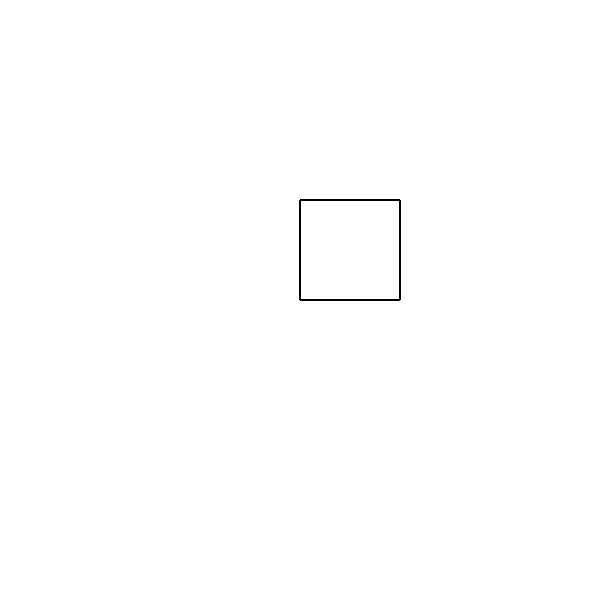

In [24]:
🐢 = Turtle()
@svg begin

	for i in 1:4
		forward(🐢, 100)
		turn(🐢, -90)
	end

end

The following is a series of exercises using turtles have a point. While you are working on them, think about what the point is. The following sections have solutions to the exercises, so do not look until you have finished (or at least tried).

## Exercise 4-2

Write a function called square that takes a parameter named t, which is a turtle. It should use the turtle to draw a square.

## Exercise 4-3

Write a function call that passes t as an argument to square, and then run the macro again.

## Exercise 4-4

Add another parameter, named len, to square. Modify the body so length of the sides is len, and then modify the function call to provide a second argument. Run the macro again. Test with a range of values for len.

## Exercise 4-5

Make a copy of square and change the name to polygon. Add another parameter named n and modify the body so it draws an n-sided regular polygon. The exterior angles of an n-sided regular polygon are 360n degrees.

## Exercise 4-6

Write a function called circle that takes a turtle, t, and radius, r, as parameters and that draws an approximate circle by calling polygon with an appropriate length and number of sides. Test your function with a range of values of r. Figure out the circumference of the circle and make sure that len * n == circumference.

## Exercise 4-7

Make a more general version of circle called arc that takes an additional parameter angle, which determines what fraction of a circle to draw. angle is in units of degrees, so when angle = 360, arc should draw a complete circle.


### Encapsulation

The first exercise asks you to put your square-drawing code into a function definition and then call the function, passing the turtle as a parameter. Here is a solution:

```Julia
	function square(t)
		for i in 1:4
			forward(t, 100)
			turn(t, -90)
		end
	end

	🐢 = Turtle()		# at the Julia prompt or in an IDE 

	@svg begin
		square(🐢)
	end
```

The idea is that t can be any turtle, not just 🐢, so you could create a second turtle 🐫 ( \:camel: <TAB> ) and pass it as an argument to square:

```Julia
	🐫 = Turtle()
	@svg begin
		square(🐫)
	end
```

Wrapping a piece of code up in a function is called **encapsulation**. Benefits of encapsulation:

- it attaches a name to the code, which serves as a kind of documentation;

- if you re-use the code, it is more concise to call a function twice than to copy and paste the body.


### Generalization

The next step is to add a _len_ parameter to square. Here is a solution:

```Julia
	function square(t, len)
		for i in 1:4
			forward(t, len)
			turn(t, -90)
		end
	end
```
Adding a **argument** to a function is called **generalization** because it makes the function more general: in the previous version, the square is always the same size; in this version it can be any size.

The next step is also a generalization. Instead of drawing squares, polygon draws regular polygons with any number of sides. Here is a solution:

```Julia
	function polygon(t, n, len)
		angle = 360 / n
		for i in 1:n
			forward(t, len)
			turn(t, -angle)
		end
	end
```

The following example draws a 5-sided polygon with side length 50.

```Julia
	@svg begin
		polygon(🐢, 5, 50)
	end
```

### Interface Design

The next step is to write circle, which takes a radius, r, as a parameter. Here is a simple solution that uses polygon to draw a 50-sided polygon that approximates a circle:

```Julia
	function circle(t, r)
		circumference = 2 * π * r
		n = 50
		len = circumference / n
		polygon(t, n, len)
	end
```

The first line computes the circumference of a circle with radius r using the formula 2πr. n is the number of line segments in our approximation of a circle, so len is the length of each segment. Thus, polygon draws a 50-sided polygon that approximates a circle with radius r.

Try:

```Julia
	@svg begin
		circle(🐢, 50)
	end
```

One limitation of this solution is that n is a constant, which means that for very big circles, the line segments are too long, and for small circles, we waste time drawing very small segments. One solution would be to generalize the function by taking n as a parameter. This would give the user (whoever calls circle) more control, but the interface would be less clean. 

The **interface of a function** is a summary of how it is used: what are the parameters? What does the function do? And what is the return value? 

An interface is **clean** if it allows the caller to do what they want without dealing with unnecessary details. In this example, r belongs in the interface because it specifies the circle to be drawn. n is less appropriate because it pertains to the details of how the circle should be rendered. Rather than clutter up the interface, it is better to choose an appropriate value of n depending on circumference:

```Julia
	function circle(t, r)
	    circumference = 2 * π * r
	    n = trunc(circumference / 3) + 3
	    len = circumference / n
	    polygon(t, n, len)
	end
```

Now the number of segments is an integer near circumference/3, so the length of each segment is approximately 3, which is small enough that the circles look good, but big enough to be efficient, and acceptable for any size circle. Adding 3 to n guarantees that the polygon has at least 3 sides.

Try:

```Julia
	@svg begin
		circle2(🐢, 50)
	end
```

### Refactoring

But **arc** is not as cooperative; we cannot use polygon or circle to draw an arc. One alternative is to start with a copy of polygon and transform it into arc. The result might look like this:

```Julia
	function arc(t, r, angle)

		arc_len = 2 * π * r * angle / 360
		n = trunc(arc_len / 3) + 1
		step_len = arc_len / n
		step_angle = angle / n

		for i in 1:n
			forward(t, step_len)
			turn(t, -step_angle)
		end
	end
```

The second half of this function looks like polygon, but we cannot re-use polygon without changing the interface. We could generalize polygon to take an angle as a third argument, but then polygon would no longer be an appropriate name. Instead, let us call the more general function polyline:

```Julia
	function polyline(t, n, len, angle)
		for i in 1:n
		   forward(t, len)
		   turn(t, -angle)
		end
	end
```

Now we can rewrite polygon and arc to use polyline:

```Julia
	function polygon(t, n, len)
		angle = 360 / n
		polyline(t, n, len, angle)
	end

	function arc(t, r, angle)
		arc_len = 2 * π * r * angle / 360
		n = trunc(arc_len / 3) + 1
		step_len = arc_len / n
		step_angle = angle / n
		polyline(t, n, step_len, step_angle)
	end
```

Finally, we can rewrite circle to use arc:

```Julia
	function circle(t, r)
		arc(t, r, 360)
	end
```

This process—rearranging a program to improve interfaces and facilitate code re-use is called **refactoring**. In this case, we noticed that there was similar code in arc and polygon, so we **factored it out** into polyline.

If we had planned ahead, we might have written polyline first and avoided refactoring, but often you do not know enough at the beginning of a project to design all the interfaces. Once you start coding, you understand the problem better. Sometimes refactoring is a sign that you have learned something.

### Development Plan

A development plan is a process for writing programs. The process we used in this case study is **encapsulation and generalization**. The steps of this process are:

- Start by writing a small program (perhaps with no function definitions).

- Once you get the program working, identify a coherent piece of it, **encapsulate** the piece in a function and give it a name.

- **Generalize** the function by adding appropriate parameters.

Repeat these steps until you have a set of working functions. Copy and paste working code to avoid retyping (and re-debugging).

Look for opportunities to improve the program by **refactoring**. For example, if you have similar code in several places, consider factoring it into an appropriately general function. This process has some drawbacks—we will see alternatives later—but it can be useful if you do not know ahead of time how to divide the program into functions. This approach thus lets you design as you go along.

### Docstring

**A docstring is a string before a function that explains the interface** (“doc” is short for documentation). Here is an example:

```Julia
	"""
	polyline(t, n, len, angle)

	draws n line segments with the given length and
	angle (in degrees) between them

	t : turtle
	"""

	function polyline(t, n, len, angle)
		for i in 1:n
			forward(t, len)
			turn(t, -angle)
		end
	end
```

Documentation can be accessed in the REPL or in a notebook by typing **`?`** followed by the name of a function or macro, and pressing ENTER:

```Julia
	help?> polyline
	search:

		polyline(t, n, len, angle)
		draws n line segments with the given length and
		angle (in degrees) between them
		t : turtle
```

Docstrings are often **triple-quoted strings**, also known as **multiline strings** because the triple quotes allow the string to span more than one line.

**A docstring contains the essential information someone would need to use this function.** It explains concisely what the function does (without getting into the details of how it does it). It explains what effect each parameter has on the behavior of the function and what type each parameter should be (if it is not obvious).

Writing this kind of documentation is an important part of interface design. A well-designed interface should be simple to explain; if you have a hard time explaining one of your functions, maybe the interface could be improved.

### Debugging

An interface is like a contract between a function and a caller. The caller agrees to provide certain parameters and the function agrees to do certain work. For example, polyline requires four arguments: t has to be a turtle; n has to be an integer; len should be a positive number; and angle has to be a number, which is understood to be in degrees.

These requirements are called **preconditions** because they are supposed to be true before the function starts executing. Conversely, conditions at the end of the function are **postconditions**. 

Postconditions include the intended effect of the function (like drawing line segments) and any **side effects** (like moving the turtle or making other changes).

**Preconditions are the responsibility of the caller.** If the caller violates a properly documented precondition and the function does not work correctly, the bug is in the caller, not the function.

If the preconditions are satisfied and the postconditions are not, the bug is in the function. If your pre- and post-conditions are clear, they can help with debugging.

### Exercise 4-8

The version of arc in Refactoring is not very accurate because the linear approximation of the circle is always outside the true circle. As a result, the turtle ends up a few pixels away from the correct destination. To reduce the effect of this error one proposal is written below. Read the code and see if it makes sense to you. 

```Julia
	"""
	arc(t, r, angle)

	Draws an arc with the given radius and angle:

		t: turtle
		r: radius
		angle: angle subtended by the arc, in degrees
	"""

	function arc(t, r, angle)
		arc_len = 2 * π * r * abs(angle) / 360
		n = trunc(arc_len / 4) + 3
		step_len = arc_len / n
		step_angle = angle / n

		# making a slight left turn before starting reduces
		# the error caused by the linear approximation of the arc
		turn(t, -step_angle/2)
		polyline(t, n, step_len, step_angle)
		turn(t, step_angle/2)
	end
```

### Exercise 4-12

Read about spirals at https://en.wikipedia.org/wiki/Spiral; then write a program that draws an Archimedan spiral as in Archimedan spiral.